# Overview
This is the Kaggle dataset for Image classification of Dog and Cat. i have considered 5000 images out of 25000 image.
Data is manually been divided as 4000 image of each class in training and 1000 image as testing. So we dont have do the data splitting.

Data= https://www.kaggle.com/chetankv/dogs-cats-images/downloads/dogs-cats-images.zip/1

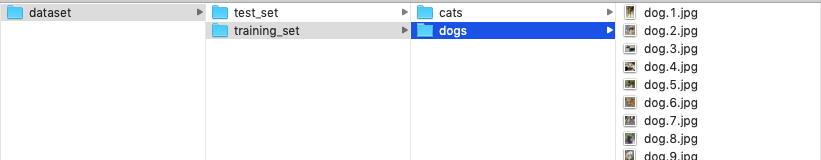

#### Building the CNN

In [1]:
#importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


Using TensorFlow backend.


In [2]:
classifier= Sequential() # Initialise the CNN

W0806 18:29:45.816555 4419089856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



#### Steps
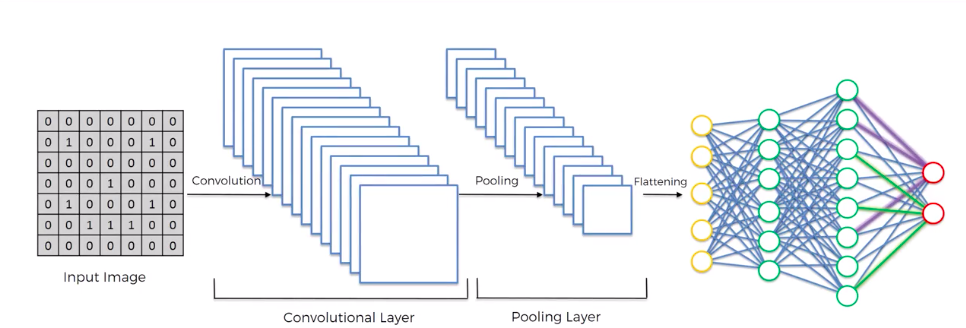

In [3]:
# Ist step of Convoltional layer to get feature maps using feature detector
classifier.add(Convolution2D(filters=32, # output feature maps
                             kernel_size=(3,3), # matrix size for feature detector
                             input_shape=(64, 64, 3), # input image shape, 3 is for rgb coloured image with 128*128 px
                             kernel_initializer='he_uniform', # weights distriution
                             activation='relu')) # activation function

W0806 18:29:45.852214 4419089856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 18:29:45.860280 4419089856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
# 2nd Pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

W0806 18:29:45.901446 4419089856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [5]:
#2nd convolutional and pooling layer.
classifier.add(Convolution2D(filters=32,
                             kernel_size=(3,3), 
                             kernel_initializer='he_uniform', 
                             activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

in case we dont do do convolutional and pooiling and directly flatten our input image pixel and pass it , out network wont be able to find the relations between each pixels and will treat each pixel indiviually.

In [6]:
# Step 3 - Flattening
classifier.add(Flatten())

In [7]:
#Step 4 full connection in which input we have from flattening

classifier.add(Dense(units=128,kernel_initializer='glorot_uniform', activation='relu')) 
#step 5 output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

W0806 18:29:46.016646 4419089856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 18:29:46.054260 4419089856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0806 18:29:46.063058 4419089856 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Fitting the model

In this we first need to do image augmentation using kera image preprocessing modules. It is necessary to to avoid the overfitting when we have less data to train which leat to high training accuracy and low testing accuracy.

In this we will make different batches of sub samples , in each batch it will have random transformations like rotating, shifting and flipping which will add diversity to data and being random our model wont get same image to get trained on.

This will help us in high performance with no overfitting.

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
#applying all the transformation we want to apply to training data set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [10]:
#Rescling the test data set images to use for validation.
test_datagen= ImageDataGenerator(rescale=1./255)

In [11]:
#Getting My training data ready for validation, so it will read all the data with the px size we gave.

training_set= train_datagen.flow_from_directory(directory= 'dataset/training_set',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=50,
                                               class_mode='binary' # for 2 class binary 
                                               )

Found 8000 images belonging to 2 classes.


In [12]:
#Getting My test data ready for validation, so it will read all the data with the px size we gave.

test_set= test_datagen.flow_from_directory(directory= 'dataset/test_set',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=50,
                                               class_mode='binary' # for 2 class binary
                                          )
                                           

Found 2000 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(training_set, #training data to fit
                        steps_per_epoch=8000, # Data in training set
                        epochs=5, # No of epochs to run
                        validation_data=test_set, # Test or validation set
                        validation_steps=2000 # no of data point for validation
                        )

In [ ]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
# Loading the image and converting the pixels into array whcih will be used as input to predict.
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'